# AFCON 2019
## As it was tweeted
### 44K Tweets
### gyleodhis@outlook.com
### [@gyleodhis](https://www.twitter.com/gyleodhis)
### ![@afcon2019](./afcon.jpg)
#### Licence:
You can use this code for anything you may wish only leave this page:

__AS IS; HOW IS, WHERE IS__

In [1]:
import pandas as pd
import datetime as datetime
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from IPython.display import display

### Reading the tweets

In [2]:
viewall = pd.read_csv("./afcon2019.csv")
#viewall.groupby('User').head(5)
viewall.head()

,Created_at,Retweets,Favorite,Tweet
0,2019-06-21 19:34:28,49,0,RT @ColinUdoh: Nigeria forward Samuel Kalu col...
1,2019-06-21 19:34:28,1247,0,"RT @LFC: Good luck to @MoSalah tonight, as Egy..."
2,2019-06-21 19:34:28,38,0,RT @brfootball: #AFCON2019 has arrived in Cair...
3,2019-06-21 19:34:27,3,0,RT @euinzim: We are all Zimbabweans tonight 🇿🇼...
4,2019-06-21 19:34:27,38,0,RT @brfootball: #AFCON2019 has arrived in Cair...


### Removing Punctuations, Numbers, and Special Characters
...__This is because they usualy have very little meaning in when doing natural language processing__
The results below reveal something interesting:
- Performing an NLP on __Swahili__ words breaks individual words hence most __Swahili tweets__ loose meaning.
- This is not a very good thing.

In [3]:
viewall['Tweet'] = viewall['Tweet'].str.replace("[^a-zA-Z#]", " ")
viewall['Tweet'] = viewall['Tweet'].str.replace("[https://]", " ")
viewall['Tweet'].head(10)

0    RT  ColinUdo   Nigeria forward Samuel Kalu col...
1    RT  LFC  Good luck  o  MoSala   onig    a  Egy...
2    RT  brfoo ball  #AFCON      a  arrived in Cair...
3    RT  euinzim  We are all Zimbabwean   onig     ...
4    RT  brfoo ball  #AFCON      a  arrived in Cair...
5    RT  lforlovelyy  PROUD  #AFCON               c...
6    RT  brfoo ball  #AFCON      a  arrived in Cair...
7    RT  brfoo ball  #AFCON      a  arrived in Cair...
8    RT  goal  Pick your #AFCON     winner         ...
9    RT  U  erKomugi  a  Nigerian    winger Samuel ...
Name: Tweet, dtype: object

### Our new data frame without punctuation marks and http links

In [4]:
viewall.head(5)

,Created_at,Retweets,Favorite,Tweet
0,2019-06-21 19:34:28,49,0,RT ColinUdo Nigeria forward Samuel Kalu col...
1,2019-06-21 19:34:28,1247,0,RT LFC Good luck o MoSala onig a Egy...
2,2019-06-21 19:34:28,38,0,RT brfoo ball #AFCON a arrived in Cair...
3,2019-06-21 19:34:27,3,0,RT euinzim We are all Zimbabwean onig ...
4,2019-06-21 19:34:27,38,0,RT brfoo ball #AFCON a arrived in Cair...


### Removing short words
...__In NLP words with made up of 3 or less characters also do add very little meaning to the overall context__

In [5]:
viewall['Tweet'] = viewall['Tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
viewall.head()

,Created_at,Retweets,Favorite,Tweet
0,2019-06-21 19:34:28,49,0,ColinUdo Nigeria forward Samuel Kalu colla ryi...
1,2019-06-21 19:34:28,1247,0,Good luck MoSala onig begin #AFCON again Zimba...
2,2019-06-21 19:34:28,38,0,brfoo ball #AFCON arrived Cairo RMbEme
3,2019-06-21 19:34:27,3,0,euinzim Zimbabwean onig Warrior Yave nyama yek...
4,2019-06-21 19:34:27,38,0,brfoo ball #AFCON arrived Cairo RMbEme


### Text Normalization
#### But first we will have to tokenize the tweets
By this I simply mean that we have to extract each word as a single entity (every word on its own)

In [6]:
tokenized_tweet = viewall['Tweet'].apply(lambda x: x.split()) # tokenizing 
tokenized_tweet.head()

0    [ColinUdo, Nigeria, forward, Samuel, Kalu, col...
1    [Good, luck, MoSala, onig, begin, #AFCON, agai...
2        [brfoo, ball, #AFCON, arrived, Cairo, RMbEme]
3    [euinzim, Zimbabwean, onig, Warrior, Yave, nya...
4        [brfoo, ball, #AFCON, arrived, Cairo, RMbEme]
Name: Tweet, dtype: object

### Now we can now normalize the tokenized tweets.

In [7]:
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

### Now let’s stitch these tokens back together.

In [8]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])    
viewall['Tweet'] = tokenized_tweet

### common words used in the tweets (All media houses combined)

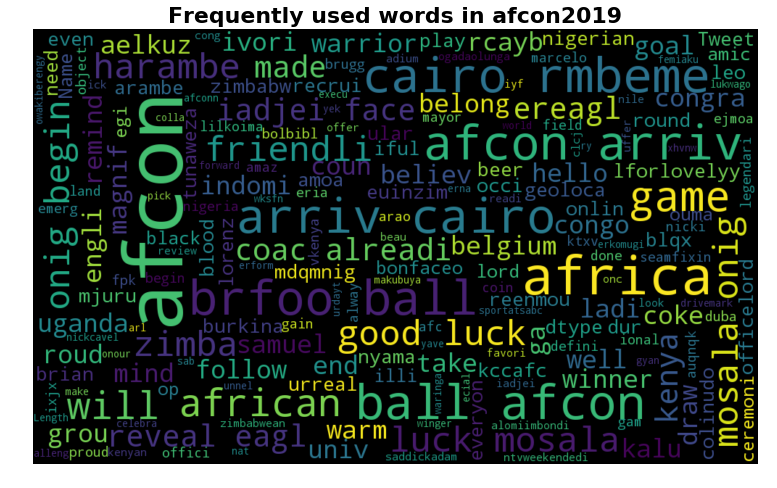

In [9]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1000, height=600, random_state=70, max_font_size=110).generate(str(tokenized_tweet)) 
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Frequently used words in afcon2019', fontsize=22, fontweight='bold')
plt.savefig('afcon2019.png')
plt.show()

#### The following words featured the most in AFCON2019:
- __AFCON__
- __AFRICA__
- __CAIRO__
- __MOSALA__
- __HARAMBEE__
- __wARRIOR__ among others.

This can gives the insight of what many people talked about with regards to this tonurment.

### Data Manipulation based on time

First we extract the day and hour which the tweets were made and put the in a separate column

In [10]:
viewall['Created_at'] = pd.to_datetime(viewall['Created_at'])
viewall = viewall.set_index("Created_at") # this is the new index of our data frame
viewall['Day'] = viewall.index.weekday_name # adds a new column for day
viewall['Hour'] = viewall.index.hour #adds a new column for hour
viewall['Minute'] = viewall.index.minute #adds a new column for minute
viewall.head()

,Retweets,Favorite,Tweet,Day,Hour,Minute
Created_at,,,,,,
2019-06-21 19:34:28,49,0,colinudo nigeria forward samuel kalu colla ry ...,Friday,19,34
2019-06-21 19:34:28,1247,0,good luck mosala onig begin #afcon again zimba...,Friday,19,34
2019-06-21 19:34:28,38,0,brfoo ball #afcon arriv cairo rmbeme,Friday,19,34
2019-06-21 19:34:27,3,0,euinzim zimbabwean onig warrior yave nyama yek...,Friday,19,34
2019-06-21 19:34:27,38,0,brfoo ball #afcon arriv cairo rmbeme,Friday,19,34


### We now create two dataframes one for days only and one for the hours which the tweets occurred

In [11]:
days = viewall[['Day','Tweet']]
days_df = days.groupby('Day').count()
hours = viewall[['Hour','Tweet']]
hours_df = hours.groupby('Hour').count()
days_df

,Tweet
Day,
Friday,25257
Monday,2207
Sunday,1464
Thursday,7141
Tuesday,4012
Wednesday,4750


### Which days saw the most tweets
The figure below shows that __fridays__ are the most engaged days while __Sundays__ are the least engaged.

Text(0.5, 0, 'Day')

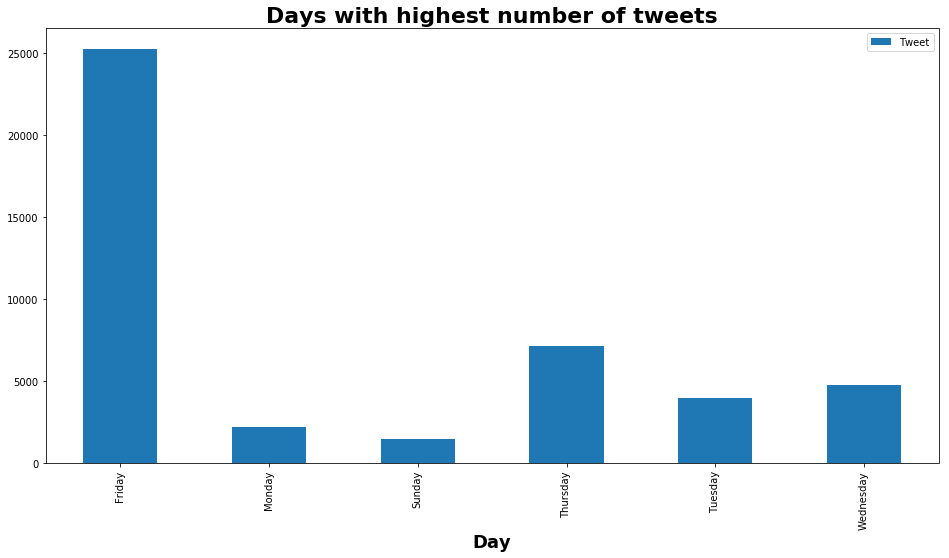

In [12]:
days_df.plot(kind="bar", figsize=(16,8))
plt.title("Days with highest number of tweets", fontsize = 22, fontweight='bold')
plt.xlabel('Day', fontsize =18, fontweight='bold')

### Which hour saw the highest number of tweets
__Note:__ The hours are returned in 24 hours clock system.

Text(0.5, 0, 'Hour')

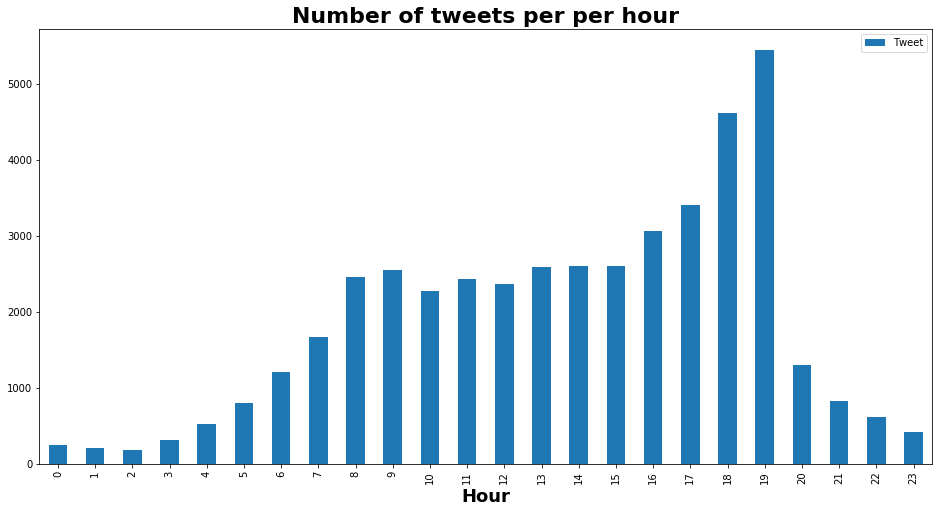

In [13]:
hours_df.plot(kind="bar", figsize=(16,8))
plt.title("Number of tweets per per hour", fontsize = 22, fontweight='bold')
plt.xlabel('Hour', fontsize =18, fontweight='bold')

### Tweets Per Minute

Text(0.5, 0, 'Minute')

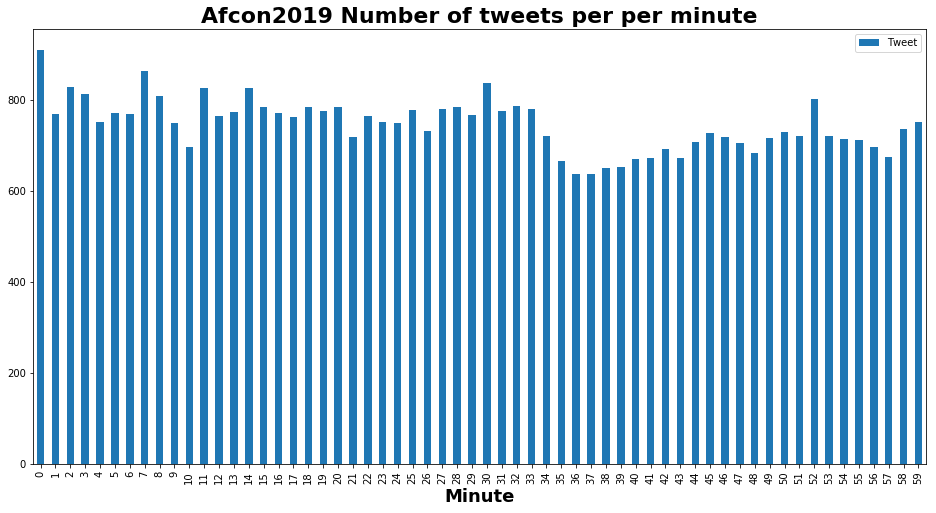

In [14]:
minutes = viewall[['Minute','Tweet']]
minutes_df = minutes.groupby('Minute').count()
minutes_df.plot(kind="bar", figsize=(16,8))
plt.title("Afcon2019 Number of tweets per per minute", fontsize = 22, fontweight='bold')
plt.xlabel('Minute', fontsize =18, fontweight='bold')

__Generally the number of tweets per minutes varies slightly between 600 - 800 tweets.__

### Most Retweeted Tweets

In [15]:
retweets = viewall[['Tweet', 'Retweets']]
retweets.sort_values('Retweets', ascending=False).head()

,Tweet,Retweets
Created_at,,
2019-06-21 08:06:01,brfoo ball #afcon oday nlogrczx,2317
2019-06-21 08:07:55,brfoo ball #afcon oday nlogrczx,2317
2019-06-21 08:00:49,#afcon oday nlogrczx,2317
2019-06-21 08:07:56,brfoo ball #afcon oday nlogrczx,2317
2019-06-21 08:08:01,brfoo ball #afcon oday nlogrczx,2317


### @brfootball tweet was the most retweeted with 2317 retweets.

## Let us now build a simple interactive dashboard

In [16]:
ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return unique
def colour_ge_value(value, comparison):
    if value >= comparison:
        return 'color: green'
    else:
        return 'color: red'

In [17]:
output = widgets.Output()
viewall = viewall.reset_index(drop=True)
dropdown_day = widgets.Dropdown(options = unique_sorted_values_plus_ALL(viewall.Day))
dropdown_hour = widgets.Dropdown(options = unique_sorted_values_plus_ALL(viewall.Hour))
bounded_num = widgets.BoundedFloatText(min=0, max=100000, value=5, step=10)

def common_filtering(Day, Hour, num):
    output.clear_output()
    
    if (Day == ALL) & (Hour == ALL):
        common_filter = viewall
    elif (Day == ALL):
        common_filter = viewall[viewall.Hour == Hour]
    elif (Hour == ALL):
        common_filter = viewall[viewall.Day == Day]
    else:
        common_filter = viewall[(viewall.Day == Day) & (viewall.Hour == Hour)]
    
    with output:
        display(common_filter.style.applymap(lambda x: colour_ge_value(x, num), subset = ['Retweets', 'Favorite']))

def dropdown_day_eventhandler(change):
    common_filtering(change.new, dropdown_hour.value, bounded_num.value)
def dropdown_hour_eventhandler(change):
    common_filtering(dropdown_day.value, change.new, bounded_num.value)
def bounded_num_eventhandler(change):
    common_filtering(dropdown_day.value, dropdown_hour.value, change.new)

dropdown_day.observe(dropdown_day_eventhandler, names='value')
dropdown_hour.observe(dropdown_hour_eventhandler, names='value')
bounded_num.observe(bounded_num_eventhandler, names='value')

display(dropdown_day)
display(dropdown_hour)
display(bounded_num)

Dropdown(options=('ALL', 'Friday', 'Monday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'), value='ALL')

Dropdown(options=('ALL', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23)…

BoundedFloatText(value=5.0, max=100000.0, step=10.0)

In [18]:
display(output)

Output()

Thats it guys.
Have a nice time and __GOD Bless.__